In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier # Backend Supoorting
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pickle


In [2]:
with open('x_y.model.pkl', 'rb') as f:
    x_loaded, y_loaded= pickle.load(f)



print('x', x_loaded)
print('*'*20)
print('y', y_loaded)

x       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0  0.013889           0.0   
1        1.0            0.0      0.0         0.0  0.472222           1.0   
2        1.0            0.0      0.0         0.0  0.027778           1.0   
3        1.0            0.0      0.0         0.0  0.625000           0.0   
4        0.0            0.0      0.0         0.0  0.027778           1.0   
...      ...            ...      ...         ...       ...           ...   
7038     1.0            0.0      1.0         1.0  0.333333           1.0   
7039     0.0            0.0      1.0         1.0  1.000000           1.0   
7040     0.0            0.0      1.0         1.0  0.152778           0.0   
7041     1.0            1.0      1.0         0.0  0.055556           1.0   
7042     1.0            0.0      0.0         0.0  0.916667           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0        

### EDA

In [15]:





std_scaler= StandardScaler()
array1=std_scaler.fit_transform(x_loaded)
x_std_df= pd.DataFrame(array1, columns= x_loaded.columns)
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_std_df, y_loaded, test_size= 0.2, random_state= 22, stratify = y_loaded)
x_scaled_train.head(3)

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
4242 -1.009559      -0.439916 -0.966622   -0.654012 -1.277445      0.327438   
4820 -1.009559      -0.439916  1.034530   -0.654012  1.043616      0.327438   
6587  0.990532       2.273159 -0.966622   -0.654012  1.287938      0.327438   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
4242      -0.854176       -0.633933     -0.725563         -0.723968  ...   
4820       1.170719        1.577454     -0.725563          1.381277  ...   
6587       1.170719        1.577454      1.378241         -0.723968  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
4242            -0.723740                    -0.885660            1.901403   
4820             1.381712                    -0.885660           -0.525927   
6587            -0.723740                     1.129102           -0.525927   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
4242                 0.904184          -0.514249          -0.562975   
4820                -1.105970          -0.514249           1.776278   
6587                 0.904184          -0.514249          -0.562975   

      PaymentMethod_Bank transfer (automatic)  \
4242                                -0.529885   
4820                                -0.529885   
6587                                 1.887201   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4242                              -0.525047                       -0.711026   
4820                              -0.525047                        1.406418   
6587                              -0.525047                       -0.711026   

      PaymentMethod_Mailed check  
4242                    1.835513  
4820                   -0.544807  
6587                   -0.544807  

[3 rows x 26 columns]

In [33]:
knn_clf= KNeighborsClassifier(n_neighbors= 6)
knn_clf.fit(x_scaled_train, y_train)
train_accuracy =knn_clf.score(x_scaled_train, y_train)
print('Training Accuracy:', train_accuracy)
print('*'*30)


Training Accuracy: 0.8271210507632233
******************************


In [17]:
pca= PCA(n_components= None)
x_train_pca_array= pca.fit_transform(x_scaled_train)
pca_columns= [f'pc{i}' for i in range(1, pca.n_components_ + 1)]
x_train_pca= pd.DataFrame(x_train_pca_array, columns= pca_columns)
x_train_pca

Knn_clf= KNeighborsClassifier()
knn_clf.fit(x_train_pca,y_train )
train_accuracy =knn_clf.score(x_train_pca, y_train)
print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.8264110756123536


In [18]:
x_test_pca_array = pca.transform(x_scaled_test)

test_accuracy =knn_clf.score(x_test_pca_array, y_test)
print('Training Accuracy:', test_accuracy)

Training Accuracy: 0.7757274662881476


In [21]:
pca= PCA(n_components= 26)
x_train_pca_array= pca.fit_transform(x_scaled_train)

pca_columns = [f"PC{i}" for i in range(1,pca.n_components_+1)]
x_train_pca = pd.DataFrame(x_train_pca_array, columns = pca_columns)

x_train_pca
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_pca , y_train) # 64 features
train_accuracy = knn_clf.score(x_train_pca, y_train)
print("Training Accuracy :",train_accuracy)

Training Accuracy : 0.8359957401490948


In [22]:
x_test_pca_array = pca.transform(x_scaled_test)

test_accuracy =knn_clf.score(x_test_pca_array, y_test)
print('Training Accuracy:', test_accuracy)

Training Accuracy: 0.759403832505323


In [23]:
pca= PCA(n_components= None)
x_train_pca_array= pca.fit_transform(x_scaled_train)

pca_columns = [f"PC{i}" for i in range(1,pca.n_components_+1)]
x_train_pca = pd.DataFrame(x_train_pca_array, columns = pca_columns)

x_test_pca_array = pca.transform(x_scaled_test)
x_test_pca= pd.DataFrame(x_test_pca_array, columns= pca_columns)


train_accuracy_list = []
test_accuracy_list = []
pca_values = range(1, pca.n_components_+1)
for i in pca_values:
    knn_clf = KNeighborsClassifier(n_neighbors=8, p = 2)
    knn_clf.fit(x_train_pca.iloc[:,:i] , y_train)
    train_accuracy_list.append(knn_clf.score(x_train_pca.iloc[:,:i], y_train))
    test_accuracy_list.append(knn_clf.score(x_test_pca.iloc[:,:i], y_test))

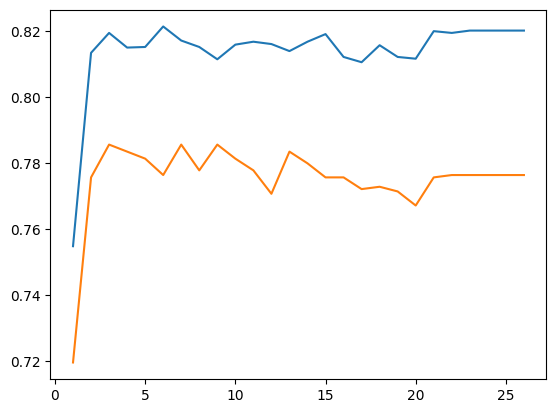

In [24]:
plt.plot(pca_values, train_accuracy_list)
plt.plot(pca_values, test_accuracy_list)

In [25]:
px.line(x= pca_values, y= train_accuracy_list)


In [26]:
px.line(x=pca_values, y= test_accuracy_list)

In [30]:
pca= PCA(n_components= 8)
x_train_pca_array= pca.fit_transform(x_scaled_train)

pca_columns = [f"PC{i}" for i in range(1,pca.n_components_+1)]
x_train_pca = pd.DataFrame(x_train_pca_array, columns = pca_columns)

x_train_pca
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_pca , y_train) # 64 features
train_accuracy = knn_clf.score(x_train_pca, y_train)
print("Training Accuracy :",train_accuracy)

Training Accuracy : 0.8422080227192048


In [31]:
x_test_pca_array = pca.transform(x_scaled_test)

test_accuracy =knn_clf.score(x_test_pca_array, y_test)
print('Training Accuracy:', test_accuracy)

Training Accuracy: 0.7636621717530163
